# Random Forest and Decision Tree Project 

For this project we will analyze publically available data from [LendingClub.com] for this project (www.lendingclub.com). Lending Club matches lenders with borrowers, who are those who need money (investors). Ideally, as an investor, you would want to invest in people that had a strong track record of repaying investors. We'll try to develop a model that can predict this.

Let's look at some of Lending Club's data while keeping in mind that 2016 was a [very fascinating year](https://en.wikipedia.org/wiki/Lending_Club#2016). Prior to their ever becoming public, this data was available.


We will be attempting to categorise and anticipate whether or not the borrower fully repaid their loan using lending data from 2007 to 2010 in this study. You can utilise the csv that is already given or obtain the [data from here](https://www.lendingclub.com/info/download-data.action). It is advised that you use the given csv because NA values have been cleared from it.

What columns stand for is as follows:

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data


In [ ]:
df=pd.read_csv('loan_data.csv')

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.


*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

Text(0.5, 0, 'FICO')

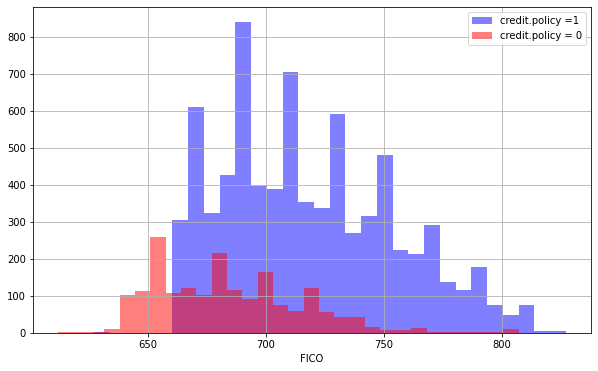

In [ ]:
plt.figure(figsize=(10,6))
df[df['credit.policy'] == 1]['fico'].hist(alpha = 0.5,color = 'blue', bins = 30,label = 'credit.policy =1 ')
df[df['credit.policy'] == 0]['fico'].hist(alpha = 0.5,color = 'red', bins = 30,label = 'credit.policy = 0')
plt.legend()
plt.xlabel('FICO')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2f74d7070>,
      dtype=object)

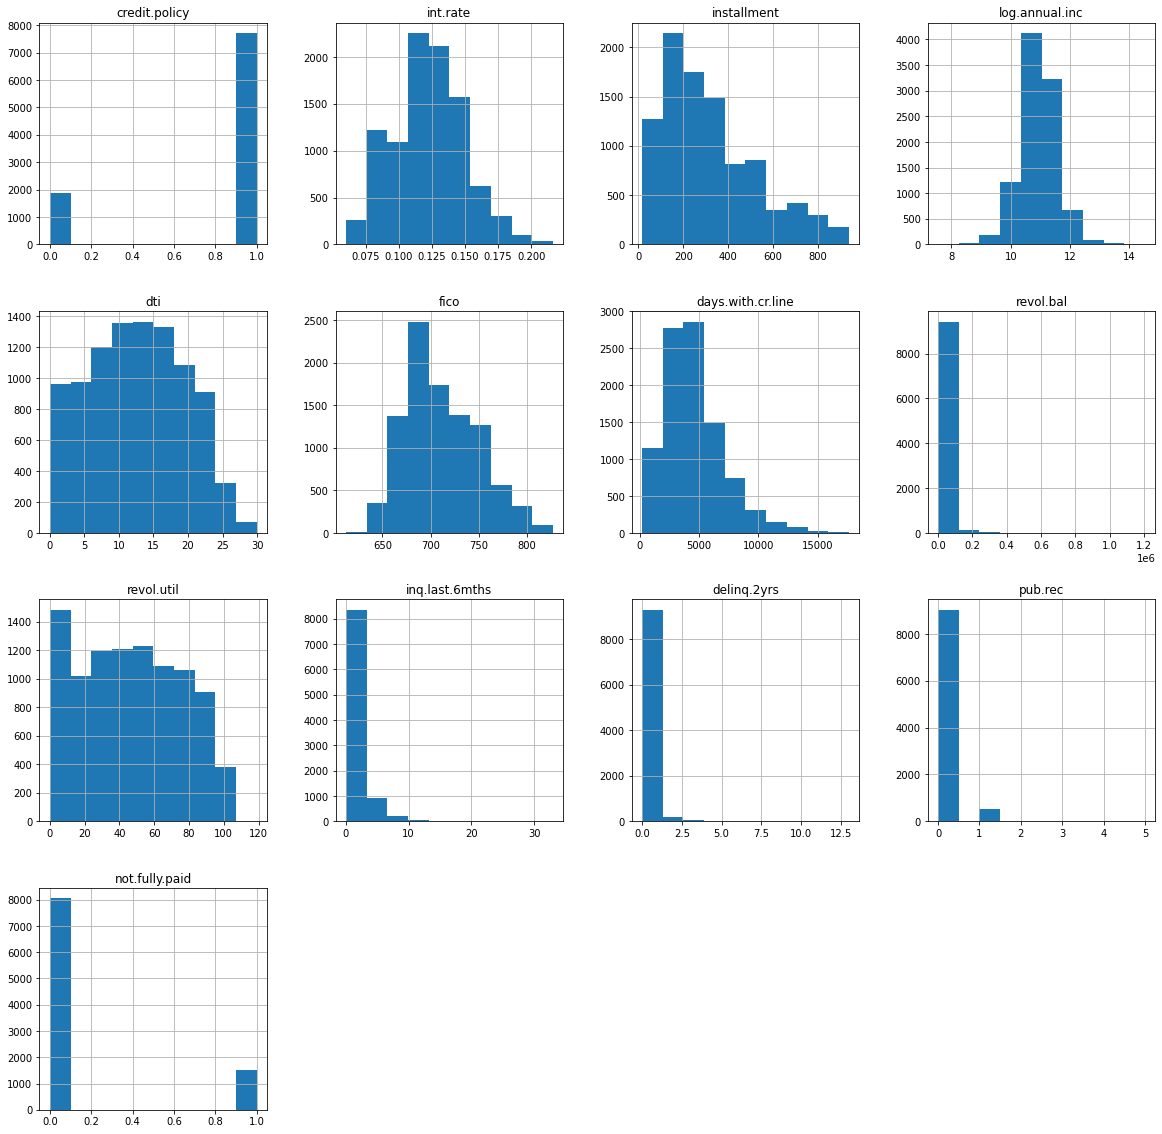

In [ ]:
df.hist(figsize=(20,20))

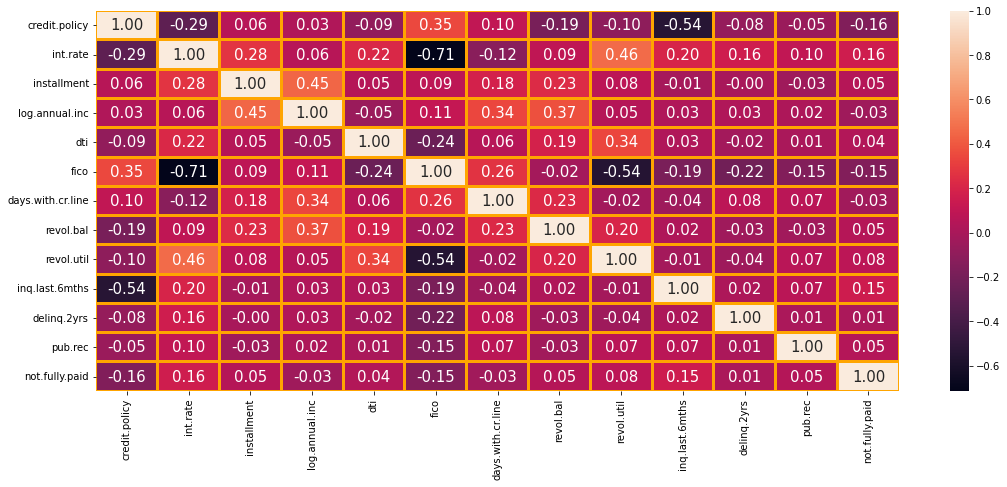

In [ ]:
plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

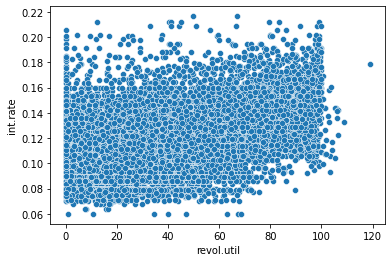

In [ ]:
sns.scatterplot(y='int.rate',x='revol.util',data=df)

Text(0.5, 0, 'FICO')

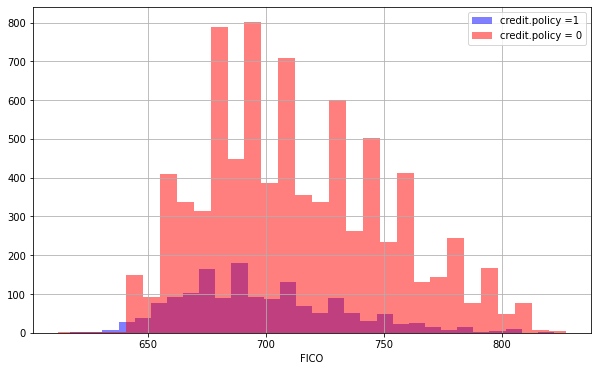

In [ ]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid'] == 1]['fico'].hist(alpha = 0.5,color = 'blue', bins = 30,label = 'credit.policy =1 ')
df[df['not.fully.paid'] == 0]['fico'].hist(alpha = 0.5,color = 'red', bins = 30,label = 'credit.policy = 0')
plt.legend()
plt.xlabel('FICO')

In [ ]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


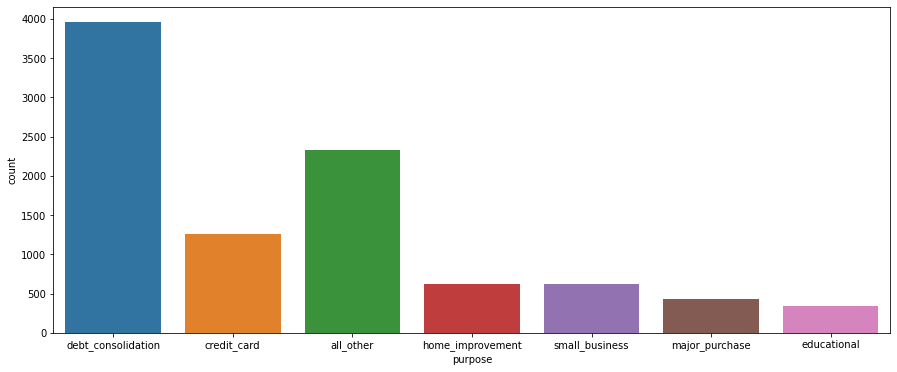

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='purpose')


maximum people has debt_consolidation purpose of the loan

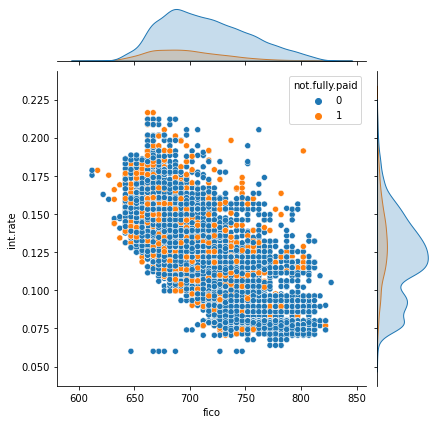

In [ ]:
sns.jointplot(x='fico',y='int.rate',hue='not.fully.paid',data=df)

As fico increase interest rate decrease 

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

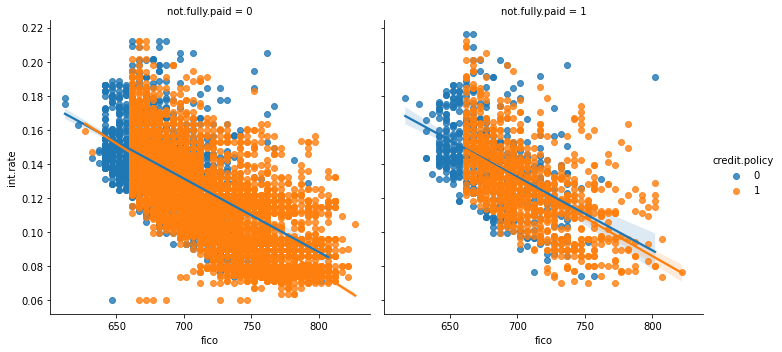

In [ ]:
sns.lmplot(x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid',data=df)

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')

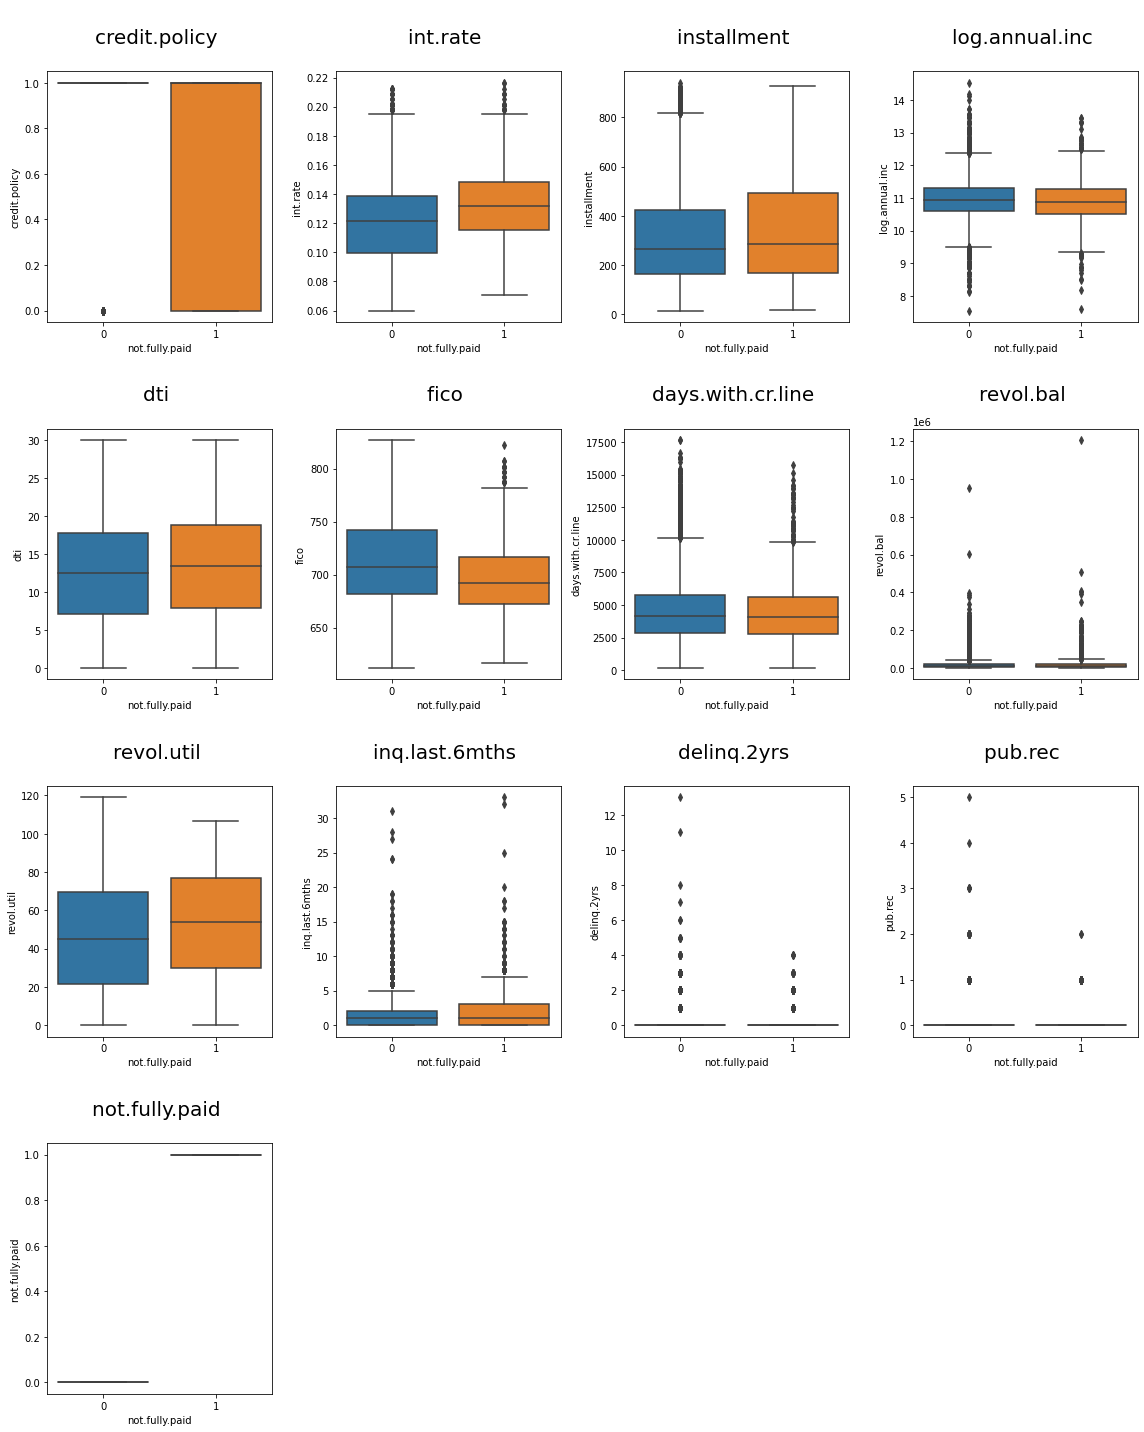

In [ ]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(x='not.fully.paid',y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.



In [ ]:
cat_feats=['purpose']

In [ ]:
cat_feats

['purpose']

In [ ]:
final_data= pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [ ]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


## Train Test Split

To split our data into a training set and a testing set!



In [ ]:
X=final_data.drop('not.fully.paid',axis=1)
y= final_data['not.fully.paid']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [ ]:
predictions= dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2403
           1       0.22      0.24      0.23       471

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.74      0.74      2874



In [ ]:
print(confusion_matrix(y_test,predictions))

[[2016  387]
 [ 359  112]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc =RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [ ]:
predictions = rfc.predict(X_test)

# Create a classification report from the results.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2403
           1       0.27      0.01      0.02       471

    accuracy                           0.83      2874
   macro avg       0.55      0.50      0.46      2874
weighted avg       0.74      0.83      0.76      2874



**Confusion Matrix for the predictions.**

In [ ]:
print(confusion_matrix(y_test,predictions))

[[2392   11]
 [ 467    4]]


[Text(0.5, 0.875, 'X[0] <= 0.5\ngini = 0.267\nsamples = 6704\nvalue = [5642, 1062]'),
 Text(0.25, 0.625, 'X[2] <= 700.755\ngini = 0.407\nsamples = 1306\nvalue = [934, 372]'),
 Text(0.125, 0.375, 'X[9] <= 5.5\ngini = 0.397\nsamples = 1224\nvalue = [890, 334]'),
 Text(0.0625, 0.125, 'gini = 0.373\nsamples = 927\nvalue = [697, 230]'),
 Text(0.1875, 0.125, 'gini = 0.455\nsamples = 297\nvalue = [193, 104]'),
 Text(0.375, 0.375, 'X[2] <= 839.965\ngini = 0.497\nsamples = 82\nvalue = [44, 38]'),
 Text(0.3125, 0.125, 'gini = 0.476\nsamples = 41\nvalue = [16, 25]'),
 Text(0.4375, 0.125, 'gini = 0.433\nsamples = 41\nvalue = [28, 13]'),
 Text(0.75, 0.625, 'X[1] <= 0.103\ngini = 0.223\nsamples = 5398\nvalue = [4708, 690]'),
 Text(0.625, 0.375, 'X[8] <= 77.2\ngini = 0.117\nsamples = 1502\nvalue = [1408, 94]'),
 Text(0.5625, 0.125, 'gini = 0.109\nsamples = 1480\nvalue = [1394, 86]'),
 Text(0.6875, 0.125, 'gini = 0.463\nsamples = 22\nvalue = [14, 8]'),
 Text(0.875, 0.375, 'X[17] <= 0.5\ngini = 0.259\n

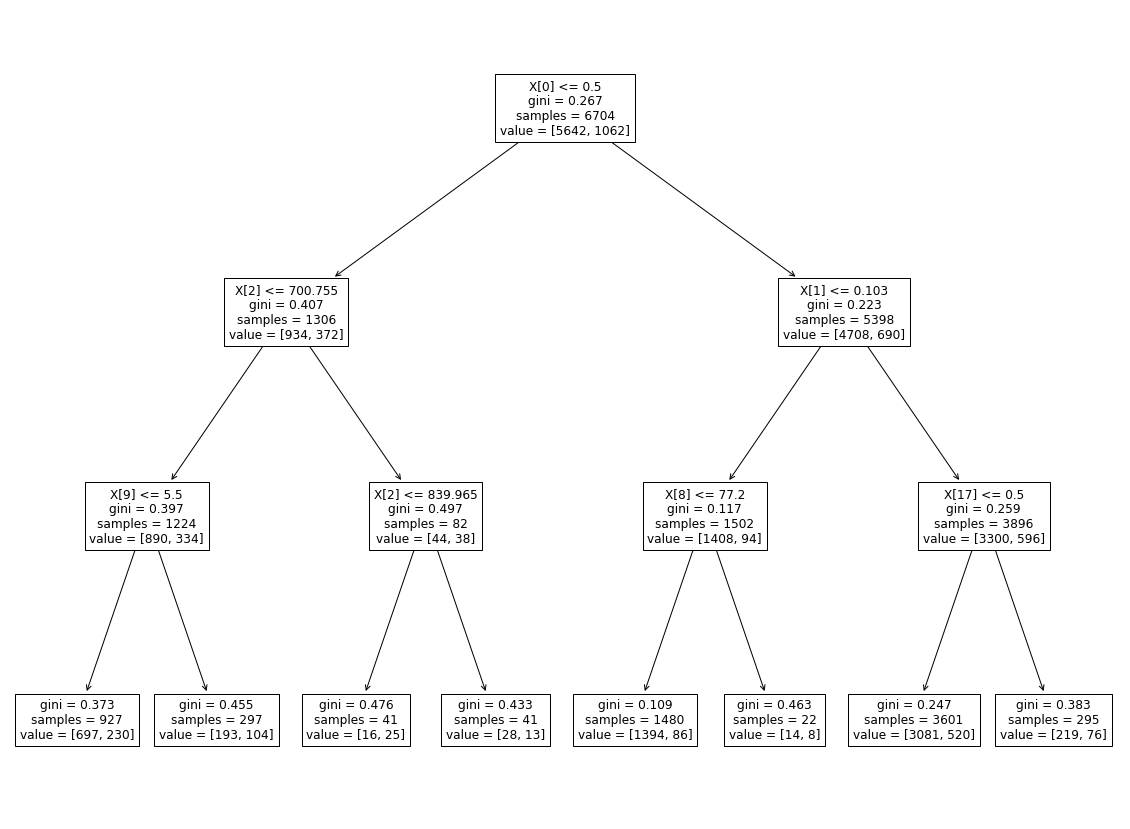

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
plt.figure(figsize=(20,15))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

[Text(0.5, 0.875, 'X[0] <= 0.5\nentropy = 0.63\nsamples = 6704\nvalue = [5642, 1062]'),
 Text(0.25, 0.625, 'X[2] <= 700.755\nentropy = 0.862\nsamples = 1306\nvalue = [934, 372]'),
 Text(0.125, 0.375, 'X[5] <= 749.5\nentropy = 0.846\nsamples = 1224\nvalue = [890, 334]'),
 Text(0.0625, 0.125, 'entropy = 0.853\nsamples = 1199\nvalue = [865, 334]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.375, 0.375, 'X[2] <= 839.965\nentropy = 0.996\nsamples = 82\nvalue = [44, 38]'),
 Text(0.3125, 0.125, 'entropy = 0.965\nsamples = 41\nvalue = [16, 25]'),
 Text(0.4375, 0.125, 'entropy = 0.901\nsamples = 41\nvalue = [28, 13]'),
 Text(0.75, 0.625, 'X[1] <= 0.093\nentropy = 0.551\nsamples = 5398\nvalue = [4708, 690]'),
 Text(0.625, 0.375, 'X[5] <= 744.5\nentropy = 0.283\nsamples = 1098\nvalue = [1044, 54]'),
 Text(0.5625, 0.125, 'entropy = 0.437\nsamples = 322\nvalue = [293, 29]'),
 Text(0.6875, 0.125, 'entropy = 0.205\nsamples = 776\nvalue = [751, 25]'),
 Text(0.875, 0.

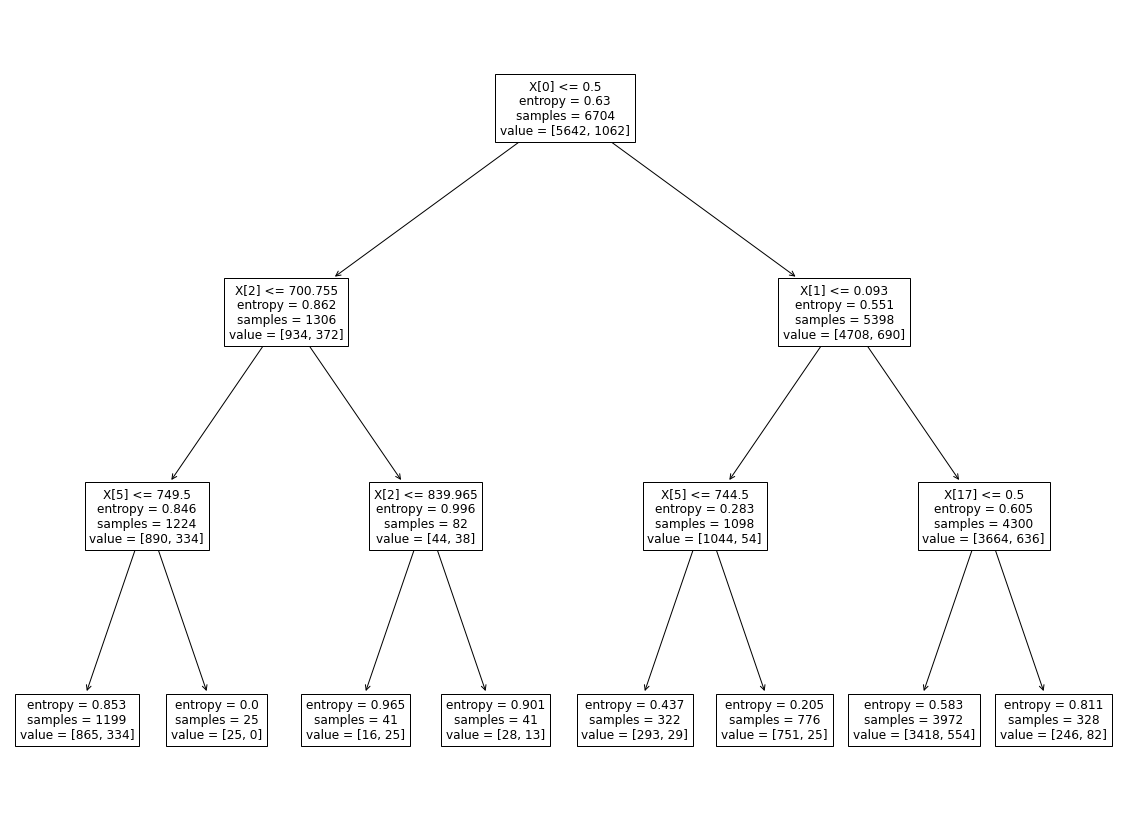

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
plt.figure(figsize=(20,15))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 